## Python For Machine Learning Fall 2025
---
# Gradient Descent for Univariate Linear Regression

### Gradient Descent

While a closed-form solution (known as the Normal Equation) exists for linear regression, which can directly calculate the **optimal** parameters, it becomes computationally expensive  and inefficient for very large datasets $O(n^2m)$ or models with many features ($O(n^3)$). This is where gradient descent comes in.

The core principle of gradient descent is to iteratively adjust a model's parameters to minimize a function, typically a cost function or loss function. The goal is to find the set of parameters (like weights and biases in a neural network) that results in the lowest possible error between the model's predictions and the actual data.

### The "downhill" Metaphor for Gradient Descent

Imagine you're a hiker on a foggy mountain, and your goal is to get to the lowest point in the valley. The fog is so thick you can't see the bottom. What do you do?

- You feel the slope of the ground beneath your feet. This is the gradient.
- You take a step in the direction that goes downhill the steepest.
- You repeat this process, taking small steps, always moving in the direction of the steepest descent.

Gradient descent works in a similar way:

- The "mountain" is the cost function, which measures the model's error. The "valley" is the minimum error.
- The "hiker's position" represents the current values of the model's parameters.
- The "slope of the ground" is the gradient of the cost function with respect to the parameters. The gradient is a vector that points in the direction of the steepest ascent. Since we want to find the minimum, we move in the opposite direction of the gradient.

### The Algorithm


The algorithm is an iterative process that follows these steps:

- Initialize Parameters: Start with a random initial guess for the model's parameters.
- Calculate the Cost $J(\theta)$: Compute the value of the cost function using the current parameter values.
- Calculate the Gradient: Find the partial derivatives of the cost function with respect to each parameter. This gives you the gradient, which tells you the direction of the steepest increase in error.
- Update the Parameters: Adjust the parameters by taking a step in the opposite direction of the gradient. The size of this step is controlled by a value called the learning rate ($\alpha$). The update formula for a parameter (assume $w$ is one of the parameter in $\theta$) is:
$$
w_{new}=w_{old}-\alpha\cdot\frac{\partial J}{\partial w}
$$
- Iterate: Repeat steps 2-4 until the cost function is minimized or the change in parameter values becomes very small.

### Apply to Univariate Linear Regression

Let's define the matching terms in univariate linear regression.

- **Loss function**
The loss function is the average of the losses of all samples in the training set. For easier calculation during derivation, we divide it by two.
$$
J(w,b)=\frac{1}{2m}\Sigma_{i=1}^n(wx_i+b-y_i)^2
$$

- **The gradiants**
For univariate linear regression, the gradiant vector contains two components.
$$
\frac{\partial J(w,b)}{\partial w}
$$
$$
=\frac{\partial}{\partial w}[\frac{1}{2m}\Sigma_{i=1}^n(wx_i+b-y_i)^2]
$$
$$
=\frac{\partial}{\partial w}[\frac{1}{m}\Sigma_{i=1}^n(wx_i+b-y_i)(wx_i+b-y_i)'_w]
$$
$$
=\frac{\partial}{\partial w}[\frac{1}{m}\Sigma_{i=1}^n(wx_i+b-y_i)x_i]
$$
and
$$
\frac{\partial J(w,b)}{\partial b}
$$
$$
=\frac{\partial}{\partial b}[\frac{1}{2m}\Sigma_{i=1}^n(wx_i+b-y_i)^2]
$$
$$
=\frac{\partial}{\partial b}[\frac{1}{m}\Sigma_{i=1}^n(wx_i+b-y_i)(wx_i+b-y_i)'_b]
$$
$$
=\frac{\partial}{\partial b}[\frac{1}{m}\Sigma_{i=1}^n(wx_i+b-y_i)\cdot 1]
$$


Let's generate a dataset for a simple linear regression problem using `sklearn.datasets.make_regression`. The dataset has 1000 samples and one feature, with some added noise. The feature and target variables are then printed to show their shape.

In [1]:
from sklearn.datasets import make_regression

feature, target = make_regression(n_samples=1000, n_features=1, n_informative=1, noise=20, n_targets=1, random_state=1)

print(feature.shape, target.shape)

(1000, 1) (1000,)


For convinience, let's remove the additional dimension from the `feature`.

In [2]:
feature = feature.flatten()
print(feature.shape, target.shape)

(1000,) (1000,)


Visualize the generated dataset as a scatter plot.

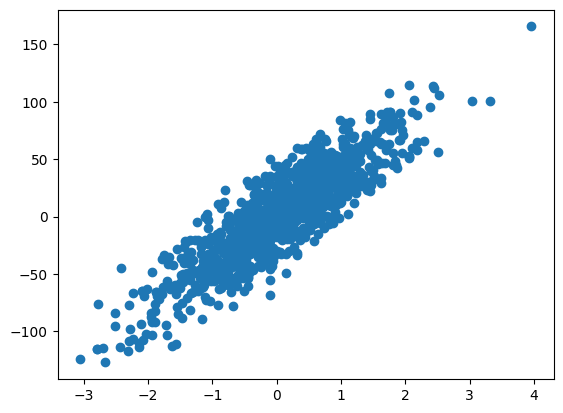

In [146]:
import matplotlib.pyplot as plt

plt.scatter(feature, target)
plt.show()

Define the model, or the predict function. This function represents our linear model, which takes a feature, a slope `w`, and an intercept `b` to predict a target value.

In [15]:
def predict(features, w, b):
  y_hat = w * features + b
  return y_hat

In gradient descent-based learning, one of the most important problems is initialization. In this code cell, we initialize the model parameters `w` (weight or slope) and `b` (bias or intercept) with random values. This is a common practice to avoid starting with a sub-optimal solution.

In [8]:
import numpy as np

w = np.random.rand()
b = np.random.rand()
print(f'Initial w: {w}, Initial b: {b}')

Initial w: 0.49321312548293683, Initial b: 0.2344221172794464


Next, we define three functions. `calculate_gradient_w` and `calculate_gradient_b` compute the gradients of the loss function with respect to w and b, respectively. The `calculate_loss` function computes the mean squared error (MSE) loss, which measures how far off our predictions are from the actual values.

In [17]:
def calculate_gradient_w(features, target, w, b):
  m = len(target)
  y_hat = predict(features, w, b)
  gradient_w = (1/m) * np.sum((y_hat - target) * features)
  return gradient_w

In [19]:
def calculate_gradient_b(features, target, w, b):
  m = len(target)
  y_hat = predict(features, w, b)
  gradient_b = (1/m) * np.sum(y_hat - target)
  return gradient_b

In [140]:
def calculate_loss(features, target, w, b):
  m = len(target)
  y_hat = predict(features, w, b)
  loss = (1/(2*m)) * np.sum((y_hat - target)**2)
  return loss

The learning rate $\alpha$ is a crucial hyperparameter that determines the step size at each iteration while moving toward a minimum of the loss function. Choosing the right learning rate is often more of an art than a science.

In [86]:
learning_rate = 0.1

With these preparations complete, we can now begin a single training iteration. This cell calculates the gradients, updates the w and b parameters, and then visualizes the updated line on the scatter plot.

Updated w: 38.190312013259316, Updated b: 0.596225643848856


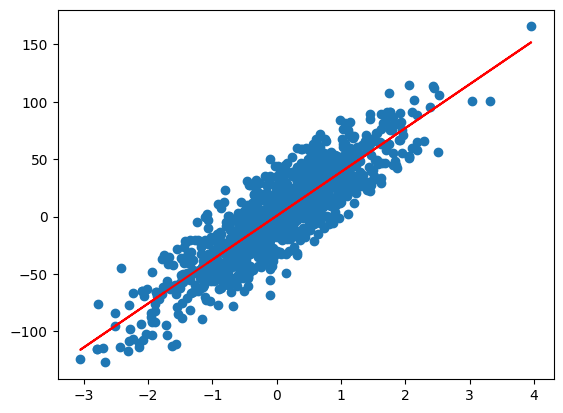

In [139]:
gw = calculate_gradient_w(feature, target, w, b)
gb = calculate_gradient_b(feature, target, w, b)
w = w - learning_rate * gw
b = b - learning_rate * gb
print(f'Updated w: {w}, Updated b: {b}')

plt.scatter(feature, target)
plt.plot(feature, predict(feature, w, b), 'r')
plt.show()

Now, we will perform multiple iterations to fully train the model. The code below contains a training loop that repeatedly calculates gradients and updates the parameters. It also includes a stop condition based on a `tolerance` value, which halts the training once the change in parameters becomes very small, indicating convergence.

In [147]:
num_iterations = 1000
tolerance = 1e-6
losses = []
w_values = []
b_values = []

for i in range(num_iterations):
  # Calculate gradients
  gw = calculate_gradient_w(feature, target, w, b)
  gb = calculate_gradient_b(feature, target, w, b)

  # Update parameters
  w_new = w - learning_rate * gw
  b_new = b - learning_rate * gb

  # Calculate current loss and append to list
  current_loss = calculate_loss(feature, target, w_new, b_new)
  losses.append(current_loss)
  w_values.append(w_new)
  b_values.append(b_new)

  # Check for convergence
  if abs(w_new - w) < tolerance and abs(b_new - b) < tolerance:
    print(f"Converged after {i+1} iterations.")
    break

  # Update parameters for the next iteration
  w = w_new
  b = b_new

print(f'Final w: {w}, Final b: {b}')

Converged after 1 iterations.
Final w: 38.257698473482584, Final b: 0.5810050911254265


In this final cell, we visualize the training process by plotting the loss and the values of parameters $w$ and $b$ over each iteration. A well-chosen learning rate will cause the loss to decrease smoothly and the parameters to converge to a stable value.

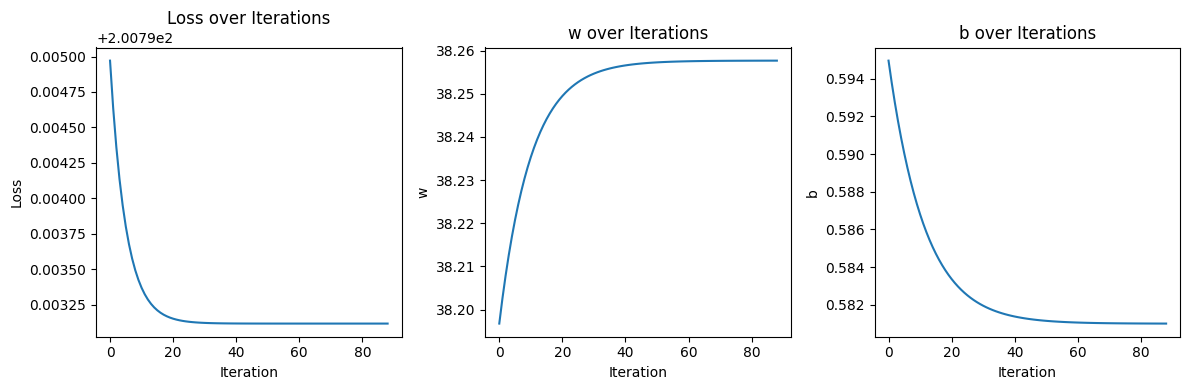

In [142]:
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 3, 1)
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss over Iterations")

# Plot w values
plt.subplot(1, 3, 2)
plt.plot(w_values)
plt.xlabel("Iteration")
plt.ylabel("w")
plt.title("w over Iterations")

# Plot b values
plt.subplot(1, 3, 3)
plt.plot(b_values)
plt.xlabel("Iteration")
plt.ylabel("b")
plt.title("b over Iterations")

plt.tight_layout()
plt.show()